<a href="https://colab.research.google.com/github/promahaque2003-commits/Milestones/blob/main/Milestone_7_Simple_Linear_Regression_(Completed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 1: Data Selection and Initial Visualization ---
Independent Variable (X): age
Dependent Variable (Y): bmi

Mean of X (age): 39.21
Mean of Y (bmi): 30.66
Variance of X: 197.40
Variance of Y: 37.19


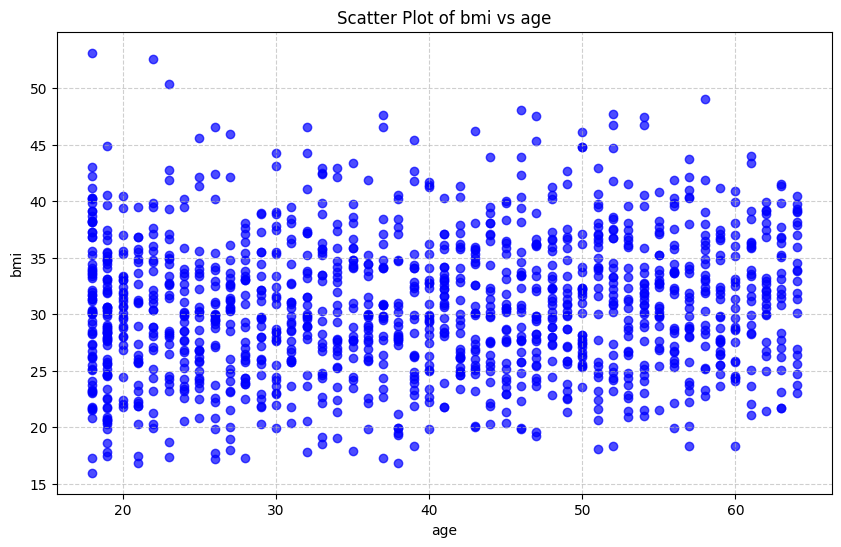


--- Task 2: Manual Calculation of Regression Parameters ---
Numerator (Sum of products of deviations): 12517.44
Denominator (Sum of squared deviations of X): 263925.65

Computed Slope (β1): 0.0474
Computed Intercept (β0): 28.8039

Estimated Regression Equation: Ŷ = 28.8039 + 0.0474 * X

--- Task 3: Visualization of the Fit ---


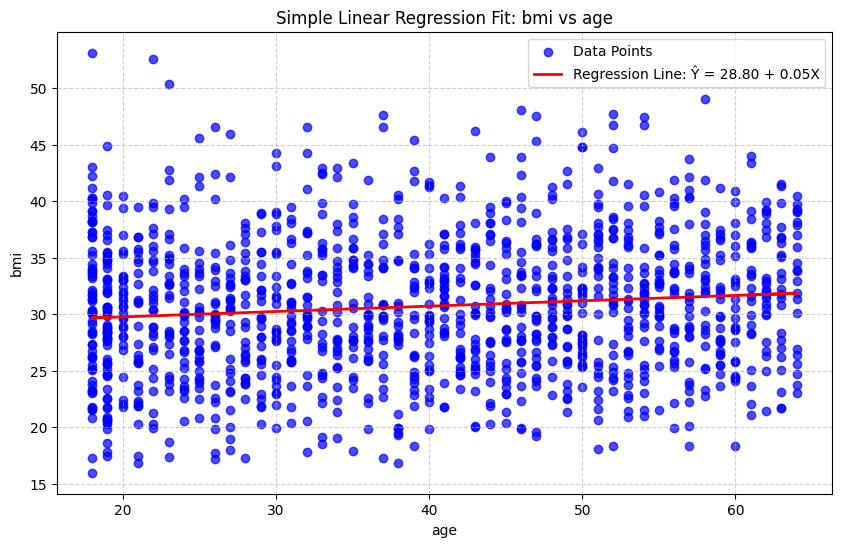


--- Task 4: Strength of Relationship ---
Pearson Correlation Coefficient (r): 0.1093
Coefficient of Determination (R²): 0.0119

--- OPTIONAL: Verification using scikit-learn ---
Manual Slope (β1): 0.0474 | SKL Slope (β1):    0.0474
Manual Intercept (β0): 28.8039 | SKL Intercept (β0):    28.8039
Manual R²: 0.0119 | SKL R²:    0.0119

Verification successful: Manual results match scikit-learn (within tolerance).

--- Task 5: Reflection ---
Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.


In [9]:
# ==============================================================================
# MILESTONE 7: SIMPLE LINEAR REGRESSION (MANUAL COMPUTATION)
# STA 2101: Statistics & Probability
#
# Objective: Calculate the parameters of the best-fit line (β0 and β1) and the
# correlation coefficient (r) using manual calculation methods.
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- DUMMY DATA SETUP (REPLACE WITH YOUR ACTUAL DATA LOADING) ---
# NOTE: This data is for demonstration. Replace with your actual dataset load.
# data = {
#     'age': [2.5, 3.2, 4.0, 5.5, 6.1, 7.5, 8.0, 8.5, 9.0, 9.5],
#     'bmi': [55, 60, 68, 75, 78, 85, 88, 92, 95, 98]
# }
# df = pd.DataFrame(data)

# --- ACTUAL DATA LOADING ---
df = pd.read_csv('insurance (2).csv')

# --- TASK 1: DATA SELECTION AND INITIAL VISUALIZATION ---
# Select the independent (X) and dependent (Y) variables.
X = df['age']
Y = df['bmi']

print("--- Task 1: Data Selection and Initial Visualization ---")
print(f"Independent Variable (X): {X.name}")
print(f"Dependent Variable (Y): {Y.name}\n")

# 1. Compute Summary Statistics
X_mean = X.mean()
Y_mean = Y.mean()
X_var = X.var(ddof=1) # Sample Variance
Y_var = Y.var(ddof=1)

print(f"Mean of X ({X.name}): {X_mean:.2f}")
print(f"Mean of Y ({Y.name}): {Y_mean:.2f}")
print(f"Variance of X: {X_var:.2f}")
print(f"Variance of Y: {Y_var:.2f}")

# 2. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.7)
plt.title(f'Scatter Plot of {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 2: MANUAL CALCULATION OF REGRESSION PARAMETERS (SLOPE AND INTERCEPT) ---
# ------------------------------------------------------------------------------

print("\n--- Task 2: Manual Calculation of Regression Parameters ---")

# Step 1: Calculate Deviation Scores
# X_dev = (Xi - X_mean)
# Y_dev = (Yi - Y_mean)
X_dev = X - X_mean
Y_dev = Y - Y_mean

# Step 2: Calculate Components for the Slope (β1)
#
# FORMULA for β1 (Slope):
# β1 = [ Σ(Xi - X̄)(Yi - Ȳ) ] / [ Σ(Xi - X̄)² ]
#
# HINT: The numerator is the sum of the product of deviations.
# HINT: The denominator is the sum of the squared deviations of X.

numerator_b1 = (X_dev * Y_dev).sum() # COMPLETED: Implements the numerator calculation
denominator_b1 = (X_dev**2).sum() # COMPLETED: Implements the denominator calculation

print(f"Numerator (Sum of products of deviations): {numerator_b1:.2f}")
print(f"Denominator (Sum of squared deviations of X): {denominator_b1:.2f}")

# Step 3: Compute Slope (β1)
beta_1 = numerator_b1 / denominator_b1 # COMPLETED: Implements the final β1 calculation

print(f"\nComputed Slope (β1): {beta_1:.4f}")

# Step 4: Compute Intercept (β0)
#
# FORMULA for β0 (Y-Intercept):
# β0 = Ȳ - β1 * X̄

beta_0 = Y_mean - beta_1 * X_mean # COMPLETED: Implements the β0 calculation

print(f"Computed Intercept (β0): {beta_0:.4f}")

# Step 5: Formulate the Model
print(f"\nEstimated Regression Equation: Ŷ = {beta_0:.4f} + {beta_1:.4f} * X")

# ------------------------------------------------------------------------------
# --- TASK 3: VISUALIZATION OF THE FIT ---
# ------------------------------------------------------------------------------

print("\n--- Task 3: Visualization of the Fit ---")

# 1. Generate Predictions (Ŷ)
# FORMULA: Ŷi = β0 + β1 * Xi
Y_pred = beta_0 + beta_1 * X # COMPLETED: Implements the prediction calculation

# 2. Plot Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.7)
plt.plot(X, Y_pred, color='red', linewidth=2, label=f'Regression Line: Ŷ = {beta_0:.2f} + {beta_1:.2f}X')
plt.title(f'Simple Linear Regression Fit: {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 4: STRENGTH OF RELATIONSHIP (CORRELATION AND R-SQUARED) ---
# ------------------------------------------------------------------------------

print("\n--- Task 4: Strength of Relationship ---")

# 1. Compute Pearson Correlation Coefficient (r)
#
# FORMULA for r:
# r = [ Σ(Xi - X̄)(Yi - Ȳ) ] / [ √[Σ(Xi - X̄)² * Σ(Yi - Ȳ)²] ]
#
# We already have the numerator (numerator_b1) and Σ(Xi - X̄)² (denominator_b1).
# We still need Σ(Yi - Ȳ)²:

sum_squared_deviations_Y = (Y_dev**2).sum() # COMPLETED: Implements Σ(Yi - Ȳ)² calculation
denominator_r = np.sqrt(denominator_b1 * sum_squared_deviations_Y) # COMPLETED: Implements the denominator of r

r = numerator_b1 / denominator_r # COMPLETED: Implements the final r calculation
print(f"Pearson Correlation Coefficient (r): {r:.4f}")

# 2. Compute Coefficient of Determination (R²)
# FORMULA: R² = r²
R_squared = r**2 # COMPLETED: Implements the R² calculation
print(f"Coefficient of Determination (R²): {R_squared:.4f}")

# ------------------------------------------------------------------------------
# --- OPTIONAL SECTION: Compare with scikit-learn Library Solution ---
# This section is strictly for verification of your manual calculations.
# ------------------------------------------------------------------------------

try:
    from sklearn.linear_model import LinearRegression
    print("\n--- OPTIONAL: Verification using scikit-learn ---")

    # Reshape X for scikit-learn (required for single feature)
    X_skl = X.values.reshape(-1, 1)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_skl, Y)

    # Extract parameters
    skl_beta_0 = model.intercept_
    skl_beta_1 = model.coef_[0]
    skl_R_squared = model.score(X_skl, Y) # R^2 score

    print(f"Manual Slope (β1): {beta_1:.4f} | SKL Slope (β1):    {skl_beta_1:.4f}")
    print(f"Manual Intercept (β0): {beta_0:.4f} | SKL Intercept (β0):    {skl_beta_0:.4f}")
    print(f"Manual R²: {R_squared:.4f} | SKL R²:    {skl_R_squared:.4f}")

    if np.isclose(beta_1, skl_beta_1, atol=1e-4) and np.isclose(beta_0, skl_beta_0, atol=1e-4):
        print("\nVerification successful: Manual results match scikit-learn (within tolerance).")
    else:
        print("\nVerification failed: Manual results DO NOT closely match scikit-learn.")

except ImportError:
    print("\nOPTIONAL: scikit-learn is not installed. Skipping comparison.")
except NameError:
     print("\nOPTIONAL: Cannot run comparison. Ensure all manual variables (beta_0, beta_1, R_squared) are correctly defined above.")

# ------------------------------------------------------------------------------
# --- TASK 5: REFLECTION (To be completed in your written report) ---
# ------------------------------------------------------------------------------

print("\n--- Task 5: Reflection ---")
print("Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.")